# **PROJECT-3. EDA + Feature Engineering. Соревнование на Kaggle**

Представьте, что вы работаете дата-сайентистом в компании Booking. Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов обнаружения таких отелей является **построение модели, которая предсказывает рейтинг отеля**. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель ведёт себя нечестно, и его стоит проверить.

Данные: 

**hotel_address** — адрес отеля;

**review_date** — дата, когда рецензент разместил соответствующий отзыв;

**average_score** — средний балл отеля, рассчитанный на основе последнего комментария за последний год;

**hotel_name** — название отеля;

**reviewer_nationality** — страна рецензента;

**negative_review** — отрицательный отзыв, который рецензент дал отелю;

**review_total_negative_word_counts** — общее количество слов в отрицательном отзыв;

**positive_review** — положительный отзыв, который рецензент дал отелю;

**review_total_positive_word_counts** — общее количество слов в положительном отзыве;

**reviewer_score** — оценка, которую рецензент поставил отелю на основе своего опыта;

**total_number_of_reviews_reviewer_has_given** — количество отзывов, которые рецензенты дали в прошлом;

**total_number_of_reviews** — общее количество действительных отзывов об отеле;

**tags** — теги, которые рецензент дал отелю;

**days_since_review** — количество дней между датой проверки и датой очистки;

**additional_number_of_scoring** — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.

**lat** — географическая широта отеля;

**lng** — географическая долгота отеля.

### Необходимые библиотеки 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import math

#библиотеки для визуализации 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go

# библиотеки для работы с текстом 
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# библиотека для работы с локацией 
from geopy import distance

#библиотека для нормализации 
from sklearn.preprocessing import RobustScaler

# библиотеки для работы модели 
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели
from sklearn.model_selection import train_test_split

### Загрузка данных 

In [2]:
# загружаем данные 
# на kaggle нужно заменить ячейку !

df_train = pd.read_csv('hotels_train.csv')
df_test = pd.read_csv('hotels_test.csv')
sample_submission = pd.read_csv('submission.csv')

In [3]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [5]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [7]:
sample_submission.head(2)

,reviewer_score,id
0,8.649,488440
1,7.055,274649


In [8]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewer_score  128935 non-null  float64
 1   id              128935 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 2.0 MB


In [9]:
# ВАЖНО! для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = pd.concat([df_train, df_test], axis=0) # объединяем

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515738 entries, 0 to 128934
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 10  r

In [11]:
data.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,sample
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,1


In [12]:
data.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng,sample
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000,515738.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,6.297672,49.442439,2.823803,0.749999
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,3.902295,3.466325,4.579425,0.433014
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,41.328376,-0.369758,0.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,0.625000,48.214662,-0.143372,0.250000
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,7.900000,51.499981,0.010607,1.000000
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443,1.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233,1.000000


### Функции 

**Раздел "Преобразлвание признаков"**

1) Извлечение города отеля из адреса 
2) Извлечение страны отеля из адреса 
3) Является ли гость гражданином страны, где находится отель 
4) Позитивность и неготивность отзыва 
5) Сезон, когда гости останавливались в отеле 
6) Функция извлекающая информацию о расстаянии (в км) между отелем и центром города 
7) Функция извлекающая информацию о расстаянии (в км) между отелем и центром города 

In [13]:
# 1) Извлечение города из адреса
def city(x):
    x = x.split(' ')
    y = x[-2]
    if x[-1] == 'Kingdom':
        return x[-5]
    else:
        return y

In [14]:
# 2) Извлечение страны отеля из адреса 
def country(x):
    x = x.split(' ')
    y = x[-1]
    if y == 'Kingdom':
        return 'United Kingdom'
    else:
        return y

In [15]:
# 3) Является ли гость гражданином страны, где находится отель 
# 1 - да, является, 0 - нет, не является 
def citizen(df,feature1,feature2):
    df['citizen'] = df.apply(lambda row: 1 if row[feature1] == row[feature2] else 0, axis=1)
    return df

In [16]:
# 4) Позитивность и неготивность отзыва 

def get_sentiment_scores(text):
    if text == 'No Positive' or text == 'No Negative': # Отфильтруем те отзывы, в которых нет фактически полезного текста ('No Positive'/'No Negative')
        return 0 # они не дают никакой эмоциональной окраски, поэтому закодируем их нулем
    else:
        return sent_analyzer.polarity_scores(text)['compound'] # Из остальных отзывов извлечем сводный рейтинг


In [17]:
# 5) Сезон, когда гости останавливались в отеле 
def season(type): 
    if type in ['12', '1', '2']: 
        return 'winter'
    elif type in ['3', '4', '5']:
        return 'spring'  
    elif type in ['6', '7', '8']:
        return 'summer' 
    else: 
        return 'fall'

In [18]:
# 6) Функция извлекающая информацию о расстаянии между отелем и центром города 
def extract_distance_center(df, lat_col, lng_col, city_col):

    city_centers = {
        'United Kingdom': (51.50083, -0.12444),  # London
        'France': (48.858247, 2.294494), # Paris
        'Netherlands': (52.373057, 4.892557), # Amsterdam
        'Italy': (45.464183, 9.189595), # Milan
        'Austria': (48.206487, 16.363460), # Vienna
        'Spain': (41.386378, 2.186760)  # Barcelona
    }

    # Calculate distances using vectorized operations
    df['dis_center'] = df.apply(lambda row: distance.distance(city_centers[row[city_col]], (row[lat_col], row[lng_col])).km, axis=1)

    return df

In [19]:
#7) Функция извлекающая информацию о расстаянии (в км) между отелем и центром города 
def extract_distance_airport(df, lat_col, lng_col, city_col):

    # координаты аэропорта 
    city_air = {
        'United Kingdom': (51.470915, -0.457144),  # London airport
        'France': (49.013113, 2.559809), # Paris airport
        'Netherlands': (52.311039, 4.760798), # Amsterdam airport
        'Italy': (45.646586, 8.723114), # Milan airport
        'Austria': (48.120177, 16.561098), # Vienna airport
        'Spain': (41.303091, 2.077803)  # Barcelona airport
    }

    # Calculate distances using vectorized operations
    df['dis_air'] = df.apply(lambda row: distance.distance(city_air[row[city_col]], (row[lat_col], row[lng_col])).km, axis=1)

    return df

### Преобразование данных 


In [20]:
data.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,sample
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,1


##### Пропущенные значения есть в столбцах lat и lng. Их необходимо заполнить до конца. 

In [21]:
# по техническим причинам, не получилось воспроизвести работу библиотеки geo, чтобы дополнить широту и долготу, поэтому добавляем в ручную

# Создаем датафрайм, где находятся строки только с пропущенными значениями  
empty_lat_lng = data[data['lat'].isna() & data['lng'].isna()]

# получается, у нас 17 уникальных адресов не имеют информации о долготе и широте 
# empty_lat_lng.nunique () # 17 уникальных

# список всех адресов, где отсутсвует информация 
empty_lat_lng.hotel_address.unique()

array(['Savoyenstra e 2 16 Ottakring 1160 Vienna Austria',
       '23 Rue Damr mont 18th arr 75018 Paris France',
       'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria',
       'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria',
       '4 rue de la P pini re 8th arr 75008 Paris France',
       'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria',
       'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria',
       'Bail n 4 6 Eixample 08010 Barcelona Spain',
       'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria',
       'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria',
       'Paragonstra e 1 11 Simmering 1110 Vienna Austria',
       'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria',
       '20 Rue De La Ga t 14th arr 75014 Paris France',
       'Hasenauerstra e 12 19 D bling 1190 Vienna Austria',
       'Sep lveda 180 Eixample 08011 Barcelona Spain',
       'Pau Clar s 122 Eixample 08009 Barcelona Spain',
       'Josefst dter Stra e 22 08 Jos

In [22]:
#заменяем в ручную координаты
# источник https://snipp.ru/tools/address-coord 

data.loc[data['hotel_address'] == 'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria', 'lat'] = 48.211783
data.loc[data['hotel_address'] == 'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria', 'lng'] = 16.297308

data.loc[data['hotel_address'] == '23 Rue Damr mont 18th arr 75018 Paris France', 'lat'] = 48.893762
data.loc[data['hotel_address'] == '23 Rue Damr mont 18th arr 75018 Paris France', 'lng'] = 2.347702

data.loc[data['hotel_address'] == 'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria', 'lat'] = 48.210918
data.loc[data['hotel_address'] == 'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria', 'lng'] = 16.347119

data.loc[data['hotel_address'] == 'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria', 'lat'] = 48.222139
data.loc[data['hotel_address'] == 'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria', 'lng'] = 16.357513

data.loc[data['hotel_address'] == '4 rue de la P pini re 8th arr 75008 Paris France', 'lat'] = 48.856663
data.loc[data['hotel_address'] == '4 rue de la P pini re 8th arr 75008 Paris France', 'lng'] = 2.351556

data.loc[data['hotel_address'] == 'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria', 'lat'] = 48.245935
data.loc[data['hotel_address'] == 'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria', 'lng'] = 16.341397

data.loc[data['hotel_address'] == 'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria', 'lat'] = 48.218213
data.loc[data['hotel_address'] == 'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria', 'lng'] = 16.39411

data.loc[data['hotel_address'] == 'Bail n 4 6 Eixample 08010 Barcelona Spain', 'lat'] = 41.396133
data.loc[data['hotel_address'] == 'Bail n 4 6 Eixample 08010 Barcelona Spain', 'lng'] = 1.655829

data.loc[data['hotel_address'] == 'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria', 'lat'] = 48.222139
data.loc[data['hotel_address'] == 'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria', 'lng'] = 16.357513

data.loc[data['hotel_address'] == 'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria', 'lat'] = 48.206487
data.loc[data['hotel_address'] == 'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria', 'lng'] = 16.36346

data.loc[data['hotel_address'] == 'Paragonstra e 1 11 Simmering 1110 Vienna Austria', 'lat'] = 48.176599
data.loc[data['hotel_address'] == 'Paragonstra e 1 11 Simmering 1110 Vienna Austria', 'lng'] = 16.413999

data.loc[data['hotel_address'] == 'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria', 'lat'] = 48.222139
data.loc[data['hotel_address'] == 'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria', 'lng'] = 16.357513

data.loc[data['hotel_address'] == '20 Rue De La Ga t 14th arr 75014 Paris France', 'lat'] = 48.838331
data.loc[data['hotel_address'] == '20 Rue De La Ga t 14th arr 75014 Paris France', 'lng'] = 2.330948

data.loc[data['hotel_address'] == 'Hasenauerstra e 12 19 D bling 1190 Vienna Austria', 'lat'] = 48.778035
data.loc[data['hotel_address'] == 'Hasenauerstra e 12 19 D bling 1190 Vienna Austria', 'lng'] = 15.65565

data.loc[data['hotel_address'] == 'Sep lveda 180 Eixample 08011 Barcelona Spain', 'lat'] = 41.425226
data.loc[data['hotel_address'] == 'Sep lveda 180 Eixample 08011 Barcelona Spain', 'lng'] = 2.181864

data.loc[data['hotel_address'] == 'Pau Clar s 122 Eixample 08009 Barcelona Spain', 'lat'] = 41.504994
data.loc[data['hotel_address'] == 'Pau Clar s 122 Eixample 08009 Barcelona Spain', 'lng'] = 2.245959

data.loc[data['hotel_address'] == 'Pau Clar s 122 Eixample 08009 Barcelona Spain', 'lat'] = 41.504994
data.loc[data['hotel_address'] == 'Pau Clar s 122 Eixample 08009 Barcelona Spain', 'lng'] = 2.245959

data.loc[data['hotel_address'] == 'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria', 'lat'] = 48.210918
data.loc[data['hotel_address'] == 'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria', 'lng'] = 16.347119

In [23]:
# проверим количество пропущенных значений в датафрайме data, теперь их нет, можно продолжать анализ
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515738 entries, 0 to 128934
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 10  r

##### Преобразование столбца review_date


In [24]:
# приведем дату в формат datetime 
data['review_date'] = pd.to_datetime(data['review_date'])

##### Преобразование столбца tags 

In [25]:
#приведем столбец к соответствующему виду 
if data['tags'].apply(lambda x: isinstance(x, str)).any():
    data['tags'] = data['tags'] \
    .apply(lambda x: re.findall(r"'([^']*)'", x)) \
    .apply(lambda x: [i.strip().lower() for i in x])

In [26]:
# проверим - все корректно
data.tags.head()

0    [leisure trip, couple, studio suite, stayed 2 ...
1    [business trip, couple, standard double room, ...
2    [leisure trip, solo traveler, modern double ro...
3    [leisure trip, solo traveler, standard room wi...
4    [business trip, couple, standard double or twi...
Name: tags, dtype: object

##### Преобразование столбца days_since_review

In [27]:
# в данном столбце значения имеют вид "n days"
# нам нужно только число, применяем функцию к столбцу и удаляем слово "days"
data['days_since_review'] = data['days_since_review'].apply(lambda x: int(x.split()[0]))

Таким образом, в данном разделе мы подготовили данные к тому, чтобы было удобно формировать новые признаки, а далее обучать модель. 

### Преобразование признаков 

##### Признаки из столбца **hotel_address**

Данный столбец может быть полезным, так как из него можно извлечь **страну и город**, в котором находится отель 

In [28]:
# извлекаем город из адреса (1)
data['hotel_city'] = data['hotel_address'].apply(city)

In [29]:
# извлекаем страну из адреса (2)
data['hotel_country'] = data['hotel_address'].apply(country)

In [30]:
data.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,sample,hotel_city,hotel_country
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[leisure trip, couple, studio suite, stayed 2 ...",531,51.507894,-0.143671,1,London,United Kingdom
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[business trip, couple, standard double room, ...",203,51.521009,-0.123097,1,London,United Kingdom


In [31]:
# Подготовка данных для первого графика
country_counts = data['hotel_country'].value_counts()

# Создание первого графика
fig = go.Figure(data=[go.Bar(x=country_counts.index, y=country_counts.values)])
fig.update_layout(
    title="Количество отелей по странам",
    xaxis_title="Страна",
    yaxis_title="Количество отелей",
    xaxis_tickangle=-45,  # Поворот меток оси x
    width=600,
    height=400
)

# Подготовка данных для второго графика
city_counts = data['hotel_city'].value_counts()

# Создание второго графика
fig2 = go.Figure(data=[go.Bar(x=city_counts.index, y=city_counts.values)])
fig2.update_layout(
    title="Количество отелей по городам",
    xaxis_title="Город",
    yaxis_title="Количество отелей",
    xaxis_tickangle=-45,  # Поворот меток оси x
    width=600,
    height=400
)

# Отображение графиков
fig.show()
fig2.show()



Можно сделать вывод, что в наших данных присутствуют отели только из 6 стран и 6 городов соответственно. Самое большое количество информации об отелях у тех, которые находятся в Лондоне. 

##### Признаки из столбца **reviewer_nationality**

Интересным признаком здесь будет факт о том, **является ли гость отеля гражданином той же страны, где находится отель**. 
Также выведем информацию о топ стран, **откуда прибыли гости**

In [32]:
# Является ли гость гражданином страны, где находится отель 
# 1 - да, является, 0 - нет, не является 

data['reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x: x.strip()) #удалим лишние пробелы, чтобы не было недочетов 

#применим функцию (3)
data = citizen(data,'reviewer_nationality','hotel_country')

In [33]:
# выводим долю каждой национальности рецензентов для дальнейшего преобразования 
data['reviewer_nationality'].value_counts(normalize=True)

reviewer_nationality
United Kingdom              0.475524
United States of America    0.068711
Australia                   0.042048
Ireland                     0.028749
United Arab Emirates        0.019845
                              ...   
Guinea                      0.000002
Tuvalu                      0.000002
Comoros                     0.000002
Anguilla                    0.000002
Cape Verde                  0.000002
Name: proportion, Length: 227, dtype: float64

In [34]:
# заменим значения всех остальных национальностей на 'other', оставив только те, что входят в топ-3.
list_nationality = data['reviewer_nationality'].value_counts(normalize=True).head(3).index
data['reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x: x if x in list_nationality else 'other')

In [35]:
data.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,sample,hotel_city,hotel_country,citizen
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,7,10.0,"[leisure trip, couple, studio suite, stayed 2 ...",531,51.507894,-0.143671,1,London,United Kingdom,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,14,6.3,"[business trip, couple, standard double room, ...",203,51.521009,-0.123097,1,London,United Kingdom,1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,other,No kettle in room,6,406,No Positive,...,14,7.5,"[leisure trip, solo traveler, modern double ro...",289,48.845377,2.325643,1,Paris,France,0
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,8,10.0,"[leisure trip, solo traveler, standard room wi...",681,48.888697,2.394540,1,Paris,France,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,other,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,10,9.6,"[business trip, couple, standard double or twi...",516,52.385601,4.847060,1,Amsterdam,Netherlands,0


##### Признаки из столбцов **negative_review и 	positive_review**

При помощи сторонней библиотеки SentimentIntensityAnalyzer можно рассчитать **оценку положительности и отрицательности отзыва**

In [36]:
# Инициализация анализа настроений
sent_analyzer = SentimentIntensityAnalyzer()

#применим функцию (4)
data['sentiment_scores_negative'] = data['negative_review'].apply(get_sentiment_scores)
data['sentiment_scores_positive'] = data['positive_review'].apply(get_sentiment_scores)

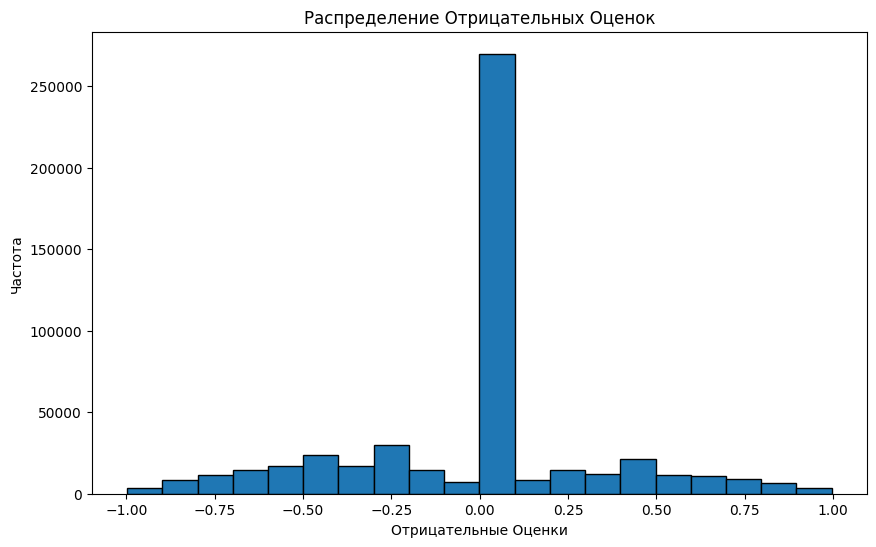

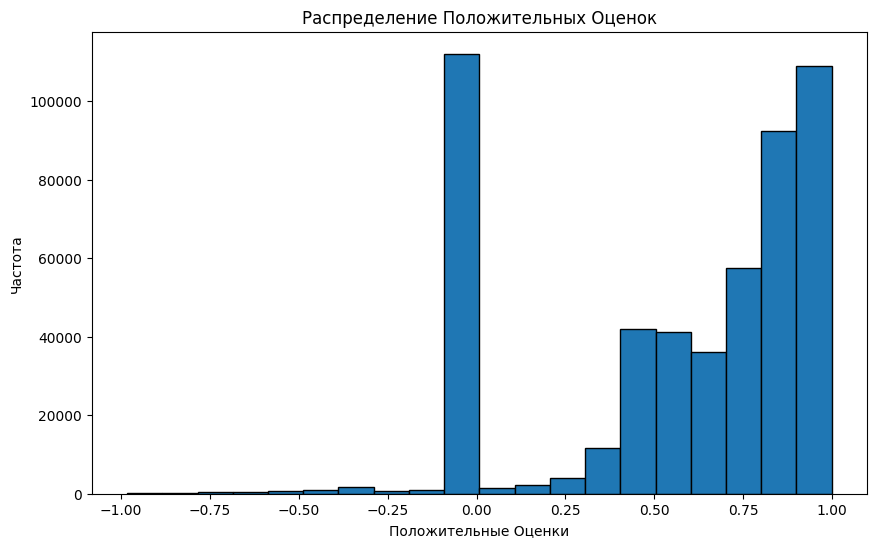

In [37]:
# Для столбца 'sentiment_scores_negative'
plt.figure(figsize=(10, 6))
plt.hist(data['sentiment_scores_negative'], bins=20, edgecolor='black')
plt.title('Распределение Отрицательных Оценок')
plt.xlabel('Отрицательные Оценки')
plt.ylabel('Частота')
plt.show()

# Для столбца 'sentiment_scores_positive'
plt.figure(figsize=(10, 6))
plt.hist(data['sentiment_scores_positive'], bins=20, edgecolor='black')
plt.title('Распределение Положительных Оценок')
plt.xlabel('Положительные Оценки')
plt.ylabel('Частота')
plt.show()


In [38]:
# проверим данные - все корректно 
data.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,tags,days_since_review,lat,lng,sample,hotel_city,hotel_country,citizen,sentiment_scores_negative,sentiment_scores_positive
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,"[leisure trip, couple, studio suite, stayed 2 ...",531,51.507894,-0.143671,1,London,United Kingdom,1,0.0000,0.5859
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,"[business trip, couple, standard double room, ...",203,51.521009,-0.123097,1,London,United Kingdom,1,-0.4767,0.0000


##### Признаки из столбца **tags**

In [39]:
# создаем датафрейм в котором мы развернули списки в столбце tags в отдельные строки 
tags_only = pd.DataFrame(
    data['tags'].explode())
tags_only.head(5)

,tags
0,leisure trip
0,couple
0,studio suite
0,stayed 2 nights
0,submitted from a mobile device


In [40]:
# создаем признаки которые будут показывать использование 11 самых частых тегов
list_tags = tags_only['tags'].value_counts().head(11).index
for i in list_tags:
    data['tag_'+ i ] = data['tags'].apply(lambda x: 1 if i in x else 0)

In [41]:
data.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,tag_submitted from a mobile device,tag_couple,tag_stayed 1 night,tag_stayed 2 nights,tag_solo traveler,tag_stayed 3 nights,tag_business trip,tag_group,tag_family with young children,tag_stayed 4 nights
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,1,1,0,1,0,0,0,0,0,0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,0,1,1,0,0,0,1,0,0,0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,other,No kettle in room,6,406,No Positive,...,1,0,0,0,1,1,0,0,0,0
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,0,0,1,0,1,0,0,0,0,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,other,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,0,1,0,0,0,0,1,0,0,0


##### Признаки из столбца **review_date**

*Из даты можно выделить **квартал, месяц, сезонн и год***

In [42]:
# добавим в датафрейм три новых столбца:квартал,месяц и год рецензии
data['quarter'] = data['review_date'].dt.quarter
data['month'] = data['review_date'].dt.month
data['year'] = data['review_date'].dt.year

In [43]:
#извлекаем сезон 
# Извлекаем месяц из даты 
data['season_type'] = data['review_date'].dt.month

# заменяем тип данных на строку, чтобы можно было применить функцию 
data['season_type'] = data['season_type'].astype(str)

# Применение функции (5)
data['season'] = data['season_type'].apply(season)

#удалим ненужный столбец
data.drop('season_type', axis= 1 , inplace= True )

##### Признаки из столбцjd **lat и lng**

In [44]:
# применим фцнкцию (6) - рассчитаем расстояние между центром и отелем 
data = extract_distance_center(data, 'lat', 'lng', 'hotel_country')

In [45]:
# применим фцнкцию (7) - рассчитаем расстояние между аэропортом и отелем 
data = extract_distance_airport(data, 'lat', 'lng', 'hotel_country')

In [46]:
data.head()


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,tag_business trip,tag_group,tag_family with young children,tag_stayed 4 nights,quarter,month,year,season,dis_center,dis_air
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,0,0,0,0,1,2,2016,winter,1.549405,22.158083
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,1,0,0,0,1,1,2017,winter,2.246957,23.858534
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,other,No kettle in room,6,406,No Positive,...,0,0,0,0,4,10,2016,fall,2.697019,25.345099
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,0,0,0,0,3,9,2015,fall,8.082633,18.383890
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,other,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,1,0,0,0,1,3,2016,spring,3.398100,10.168094


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515738 entries, 0 to 128934
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64         
 9 

После выявления признаков из широты и долготы, можно удалить эти столбцы, они не могут принести модели необходимой информации 

In [48]:
data.drop('lat', axis= 1 , inplace= True )

In [49]:
data.drop('lng', axis= 1 , inplace= True )

### Нормализация данных 

In [53]:
#проведем стандартизацию/нормализацию для числовых признаков
num_cols = ['additional_number_of_scoring','average_score',
            'review_total_negative_word_counts', 'total_number_of_reviews', 
            'review_total_positive_word_counts','total_number_of_reviews_reviewer_has_given',
            'days_since_review', 'sentiment_scores_negative' , 'sentiment_scores_positive' , 'dis_center' , 'dis_air']
num_cols

['additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'days_since_review',
 'sentiment_scores_negative',
 'sentiment_scores_positive',
 'dis_center',
 'dis_air']

In [54]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))

In [55]:
#проверим распределение числовых признаков на нормальность с помощью теста Шапиро — Уилка

for col in num_cols:
    print('Признак ' + col)
    result = stats.shapiro(data[col])
    decision_normality(result[1])

Признак additional_number_of_scoring
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Признак average_score
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Признак review_total_negative_word_counts
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Признак total_number_of_reviews
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Признак review_total_positive_word_counts
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Признак total_number_of_reviews_reviewer_has_given
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Признак days_since_review
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение о

In [56]:
from sklearn import preprocessing

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
# кодируем исходный датасет
data[num_cols] = r_scaler.fit_transform(data[num_cols])

In [57]:
data[num_cols]

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,sentiment_scores_negative,sentiment_scores_positive,dis_center,dis_air
0,0.488798,0.000000,-0.285714,-0.057096,-0.411765,0.571429,0.505682,0.000000,-0.230856,-0.453291,0.120671
1,-0.085540,-0.142857,-0.285714,-0.315253,-0.529412,1.571429,-0.426136,-2.679595,-1.330518,-0.195183,0.327262
2,-0.629328,0.714286,-0.142857,-0.704731,-0.647059,1.571429,-0.181818,-1.663856,-1.330518,-0.028651,0.507867
3,-0.625255,-1.285714,-0.428571,-0.622757,0.000000,0.714286,0.931818,0.000000,0.390390,1.964134,-0.337862
4,1.167006,0.142857,-0.238095,2.223491,0.529412,1.000000,0.463068,-1.405284,0.265390,0.230763,-1.336013
...,...,...,...,...,...,...,...,...,...,...,...
128930,-0.586558,-0.428571,-0.428571,-0.469005,-0.411765,1.571429,0.551136,0.000000,-0.539414,0.802845,2.542827
128931,-0.600815,-0.857143,-0.428571,-0.657015,0.764706,-0.285714,0.164773,0.000000,0.390390,-0.606330,-1.129781
128932,-0.164969,-0.571429,1.047619,0.541191,0.705882,-0.285714,-0.923295,1.000000,0.099662,-0.484833,-0.555794
128933,-0.370672,0.857143,-0.428571,-0.440865,0.529412,0.571429,0.661932,0.000000,0.243619,-0.485639,2.615321


#### Категоризация 

In [58]:
data = pd.get_dummies(data, columns=['season'])
data = pd.get_dummies(data, columns=['month'])
data = pd.get_dummies(data, columns=['hotel_country']) # можно взять только страну, так как на одну страну - 1 город 
data = pd.get_dummies(data, columns=['citizen']) ###

### Отбор признаков

In [59]:
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)
data.drop('review_date', axis = 1, inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515738 entries, 0 to 128934
Data columns (total 50 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  float64
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  float64
 3   total_number_of_reviews                     515738 non-null  float64
 4   review_total_positive_word_counts           515738 non-null  float64
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  float64
 6   reviewer_score                              515738 non-null  float64
 7   days_since_review                           515738 non-null  float64
 8   sample                                      515738 non-null  int64  
 9   sentiment_scores_negative                   515738 non-null  float64
 10  s

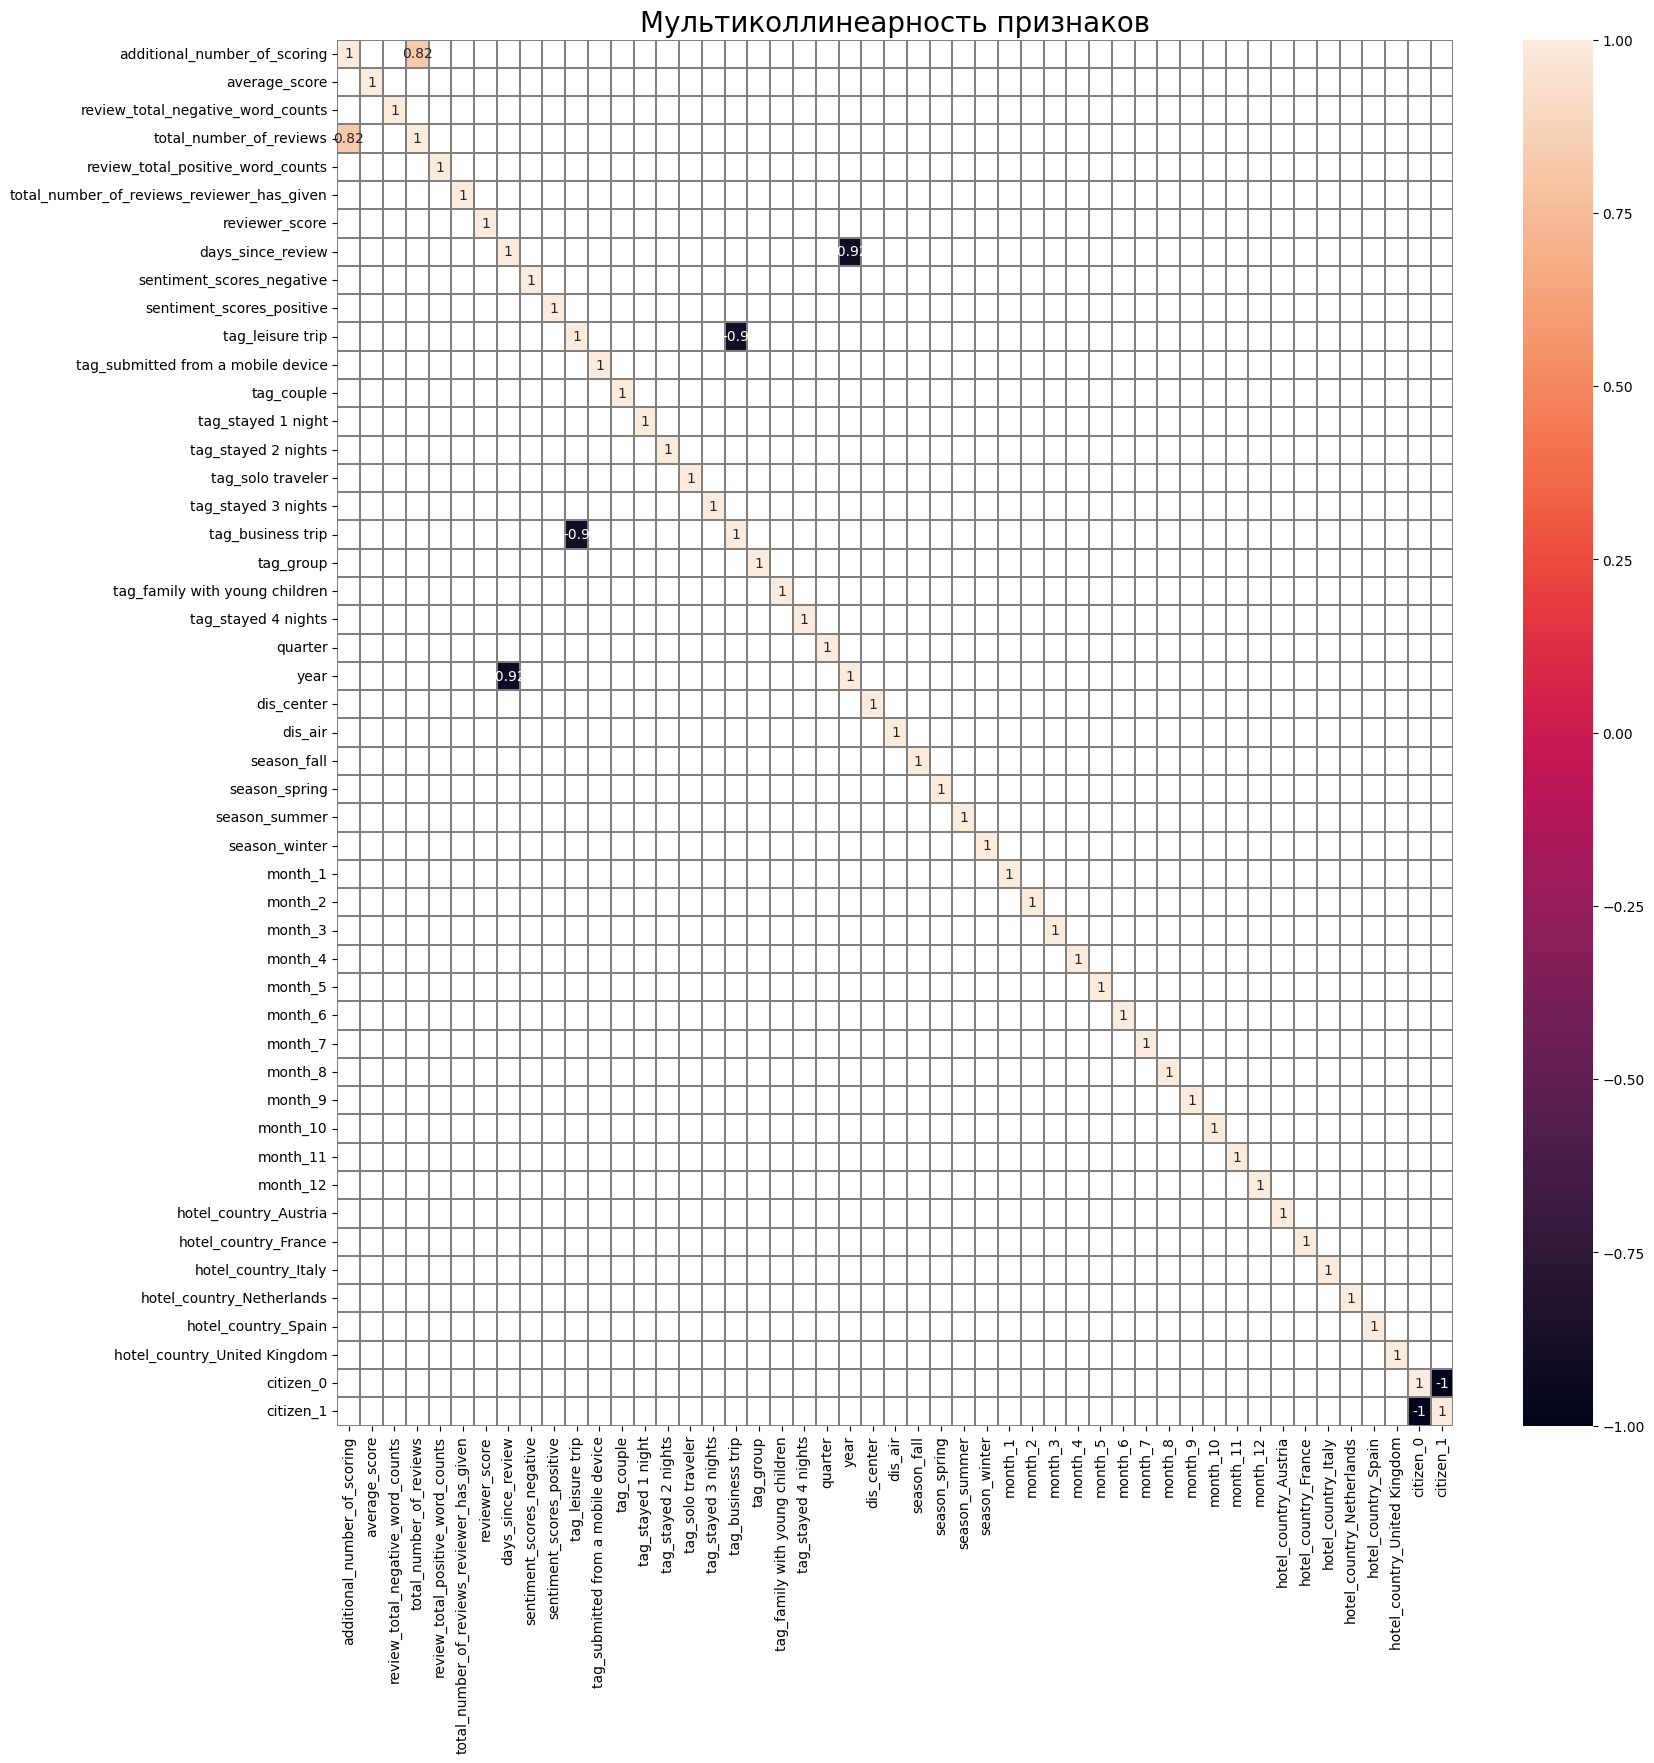

In [61]:
fig, ax = plt.subplots(figsize=(18,18))
df_corr = data.drop(['sample'], axis=1).corr()
# График - тепловая матрица с коэффициентами корреляции не менее 0.7
fig = sns.heatmap(
    df_corr[df_corr.abs() >= 0.7],
    linewidth=0.1, 
    linecolor='gray', 
    annot = True
)

fig.set_title('Мультиколлинеарность признаков', fontsize=20);

In [62]:
# сформируем список признаков для удаления на основании анализа мультиколлинеарности:
high_corr = ['year', 'tag_business trip', 'additional_number_of_scoring']


In [63]:
#удаляем выбранные признаки
data = data.drop(high_corr, axis=1)

In [64]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data['reviewer_score'] # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [65]:
y.values

array([10. ,  6.3,  7.5, ...,  8.3,  9.2,  8.8])

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386803 entries, 0 to 386802
Data columns (total 45 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               386803 non-null  float64
 1   review_total_negative_word_counts           386803 non-null  float64
 2   total_number_of_reviews                     386803 non-null  float64
 3   review_total_positive_word_counts           386803 non-null  float64
 4   total_number_of_reviews_reviewer_has_given  386803 non-null  float64
 5   days_since_review                           386803 non-null  float64
 6   sentiment_scores_negative                   386803 non-null  float64
 7   sentiment_scores_positive                   386803 non-null  float64
 8   tag_leisure trip                            386803 non-null  int64  
 9   tag_submitted from a mobile device          386803 non-null  int64  
 10  t

In [67]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [69]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 46), (386803, 46), (386803, 45), (309442, 45), (77361, 45))

In [70]:
# cоздаём модель
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [71]:
# # Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.1s finished


In [72]:
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.12573920373680844


<Axes: >

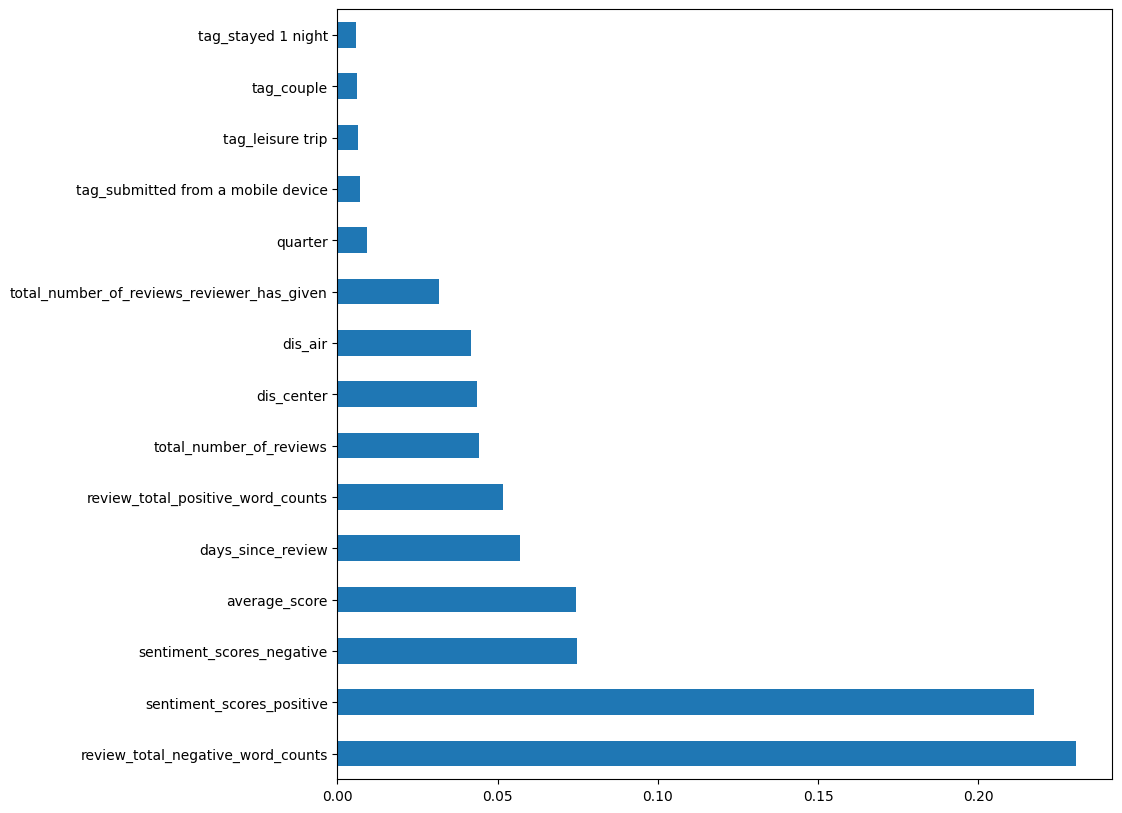

In [73]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [74]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [75]:
sample_submission

,reviewer_score,id
0,8.649,488440
1,7.055,274649
2,8.626,374688
3,9.679,404352
4,9.656,451596
...,...,...
128930,8.537,495812
128931,9.376,315577
128932,7.969,511968
128933,9.478,303386


In [76]:
predict_submission = model.predict(test_data)
predict_submission

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.6s finished


array([8.628, 7.013, 8.559, ..., 8.042, 9.541, 7.23 ])

In [77]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.628,488440
1,7.013,274649
2,8.559,374688
3,9.694,404352
4,9.628,451596
5,9.135,302161
6,8.162,317079
7,7.456,13963
8,8.462,159785
9,7.593,195089


## Вывод по проекту

В ходе проекта были проделаны базовые шаги для обучения модели. 
1) **Загрузка данных**. В данном разделе были скачены все необходимые файлы для работы и соеденены (тренироваочный и тестовый датафреймы), проведена краткая статистическая сводка. 
Изначально датафрайм имел 18 колонок и 515738 строк (за исключением столбцов lat и lng - они миели пропущенные значения). 

2) В разделе **функций** вы можете увидеть функции, которые будут применены в разделе с преобразованием признаков. Он был сделан для визуального удобства, чтобы не заграмождать раздел с преобразованем признаков. 

3) В разделе с **преобразованием данных** были применены манипуляции со столбцами, которые могли бы мешать в создании признаков. Таким образом, в данном разделе были преобразованы: 

* Пропущенные значения есть в столбцах lat и lng. Из-за некорректной работы библиотеки geo, автоматически при помощи адреса устранить эту проблему не удалось, пришлось в ручную прописывать широту и долготу для 17 адресов используя данный источник https://snipp.ru/tools/address-coord . 

* Столбец review_date был приведен в формат даты

* Столбец tags был приведен в доблесный вид для легкости его анализв 

* Из столбца days_since_review был удран последний элемент "days", чтобы признак имел числовое значение 

4) Раздел **преобразование признаков**. Издесь удалось создать такие признаки как: 

* hotel_city - город, в котором находится отель 
* hotel_country - страна, в которой находится отель 
* citizen - является ли гость гражданином страны, где находится отель
* reviewer_nationality - национальность гостя 
* sentiment_scores_negative - оценка положительного отзыва 
* sentiment_scores_positive - оценка отрицательного отзыва 
* 11 популярных тегов 
* quarter - квартал
* month
* year
* season 
* dis_center 
* dis_air 

5) После преобразования признаков, необходимо их **нормализировать** (поскольку распределение отлично от нормального)/ **категоризировать**. 

6) Последний этап - **отбор признаков и обучение модели** на тренировочном датасете. 

**MAPE: 0.12573920373680844**

